### Plotar o gráfico inical

In [1]:
import matplotlib.pyplot as plt 
import numpy as np


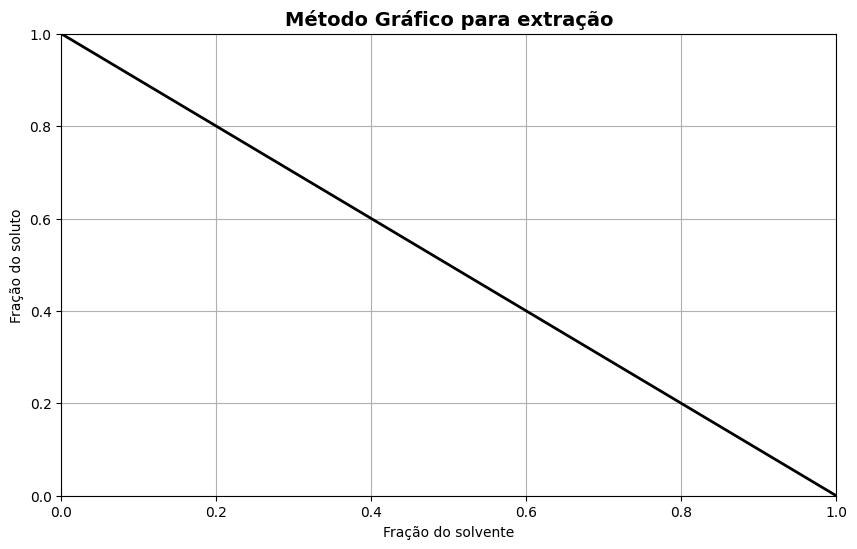

In [2]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[1,0],color='black',linewidth=2)
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,1)
plt.xlabel('Fração do solvente')
plt.ylabel('Fração do soluto')
plt.title('Método Gráfico para extração',weight='bold', size=14);


### Dados de entrada com Alimentação e Solvente

In [3]:
F, xf = 1500, 0.24
D, ys = 2800, 1
M = F + D
ret = 0.4/1  

xi_r = 1 - (1/(ret/1+1))

xf_m = F *xf / M

ys_m = D * ys / M

def dab(p1,p2):
    xa, ya = p1
    xb, yb = p2
    
    dist = np.sqrt((xb-xa)**2 + (yb-ya)**2)
    return dist

--------------------------------------------------------------------------
Ponto M: (0.6512,0.0837)
Ponto E: (0.8861,0.1139)
Ponto R: (0.2532,0.0325)
ME: 0.2368
RM: 0.4013
ME/RM : 0.5902
A vazão mássica do extrato: 2704.00 Kg, com fração de óleo: 11.3924%, fração de solvente: 88.6076%
A vazão mássica do Rafinado: 1596.00 Kg com fração de óleo: 3.2550%, fração de solvente: 25.3165% e fração inerte: 71.4286%
Rendimento da extração: 85.5696%
--------------------------------------------------------------------------


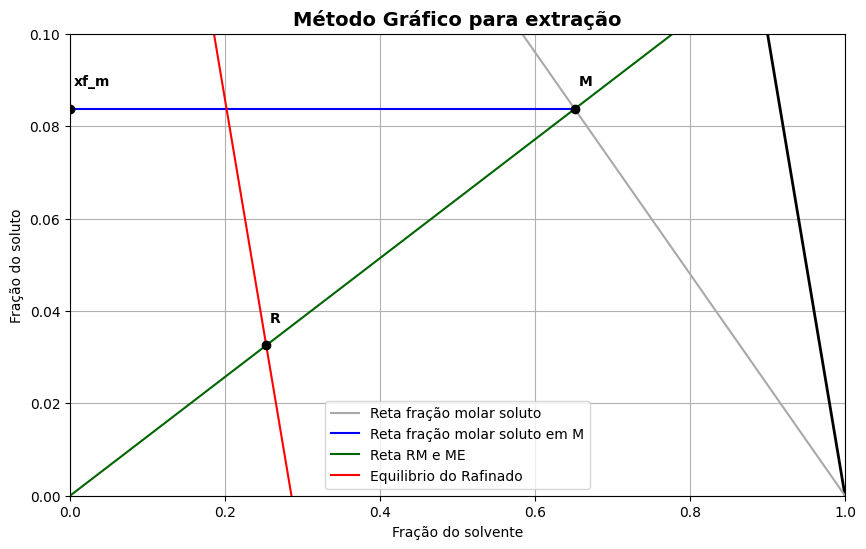

In [4]:
plt.figure(figsize=(10,6))
plt.plot([0,1],[1,0],color='black',linewidth=2)

reta_1 = plt.plot([0,1],[xf,0],color='Darkgrey',label='Reta fração molar soluto') # colocar a anotação do ponto
equa_reta1 = lambda y : (y -xf) / -xf

#Marcar o ponto M
plt.axhline(xf_m,0,equa_reta1(xf_m),color='blue',label='Reta fração molar soluto em M') # marca o ponto M
Mx , My = equa_reta1(xf_m), xf_m 

#Marcar o ponto E
reta2 = lambda x: (My/Mx) * x
Ex = 1/((My/Mx)+1)
Ey = reta2(Ex)
plt.plot([0,Ex],[0,Ey],color='darkgreen',label='Reta RM e ME')

#Marcar ponto R
plt.plot([0,xi_r],[xi_r,0],color='red',label='Equilibrio do Rafinado') # curva de equilibrio do rafinado
Rx = xi_r / ((My/Mx)+1)
Ry = reta2(Rx)

Pontos = [('xf',0,xf),('xf_m',0,xf_m),('M',Mx,My),('E',Ex,Ey),('R',Rx,Ry)]
for ponto in Pontos:
    nome,x, y = ponto
    plt.scatter(x,y,color='black',zorder=2)
    plt.annotate(nome,(x,y),weight='bold',xytext=(x+0.005,y+0.005))

#configurações do gráfico
plt.grid(True)
plt.xlim(0,1)
plt.ylim(0,0.1)
plt.xlabel('Fração do solvente')
plt.ylabel('Fração do soluto')
plt.legend()
plt.title('Método Gráfico para extração',weight='bold', size=14)

ME = dab((Mx,My),(Ex,Ey))
RM = dab((Mx,My),(Rx,Ry))
E = M / (ME/RM + 1)
R = M - E
print('--------------------------------------------------------------------------')
print(f'Ponto M: ({Mx:.4f},{My:.4f})')
print(f'Ponto E: ({Ex:.4f},{Ey:.4f})')
print(f'Ponto R: ({Rx:.4f},{Ry:.4f})')
print(f'ME: {ME:.4f}')
print(f'RM: {RM:.4f}')
print(f'ME/RM : {ME/RM:.4f}')
print(f'A vazão mássica do extrato: {E:.2f} Kg, com fração de óleo: {Ey:.4%}, fração de solvente: {Ex:.4%}')
print(f'A vazão mássica do Rafinado: {R:.2f} Kg com fração de óleo: {Ry:.4%}, fração de solvente: {Rx:.4%} e fração inerte: {1-(Ry+Rx):.4%}')
print(f'Rendimento da extração: {(E*Ey)/(F*xf):.4%}')
print('--------------------------------------------------------------------------')

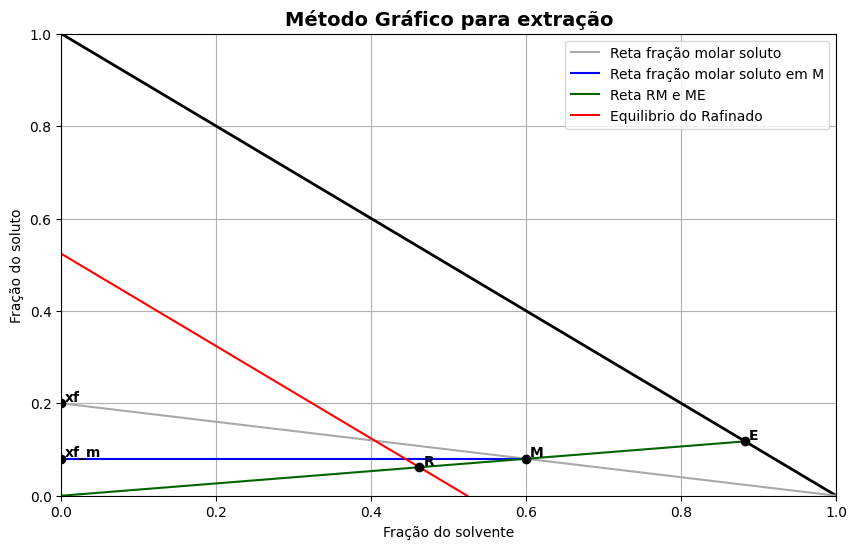

--------------------------------------------------------------------------
Ponto M: (0.6000,0.0800)
Ponto E: (0.8824,0.1176)
Ponto R: (0.4622,0.0616)
ME: 0.2849
RM: 0.1390
ME/RM : 2.0488
A vazão mássica do extrato: 1640.00 Kg, com fração de óleo: 11.7647%, fração de solvente: 88.2353%
A vazão mássica do Rafinado: 3360.00 Kg com fração de óleo: 6.1625%, fração de solvente: 46.2185% e fração inerte: 47.6190%
Rendimento da extração: 48.2353%


In [23]:
import Método_gráfico as mt

Exercicio1 = mt.McCabe_Thiele(2000,.20,3000,1,1.1)
Exercicio1.plotar()
Exercicio1.resultados()
